In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FY16 SA City Compensation.csv')
df = df.drop(['REF_#'], axis=1)

df.head()

,FIRST_NAME,MIDDLE_NAME,LAST_NAME,HIRE_DATE1,FY16_ANNUAL_SALARY2,FY16_BASE_PAY3,FY16_LEAVE_PAYOUT4,FY16_OTHER5,FY16_OVERTIME6,FY16_GROSS_EARNINGS7,FY16_ADDITIONAL_BENEFITS8,FY16_TOTAL_COMPENSATION9,JOB_TITLE,BUSINESS_AREA,GENDER,ETHNIC_ORIGIN10,EMPLOYEE_SUBGROUP
0,SHERYL,L.,SCULLEY,38663,425000.00,414615.38,0.00,97354.89,0.0,511970.27,75379.48000,587349.7500,1022-CITY_MANAGER,CITY_MANAGER'S_OFFICE,FEMALE,WHITE,2A_CITY_MGR_FT
1,CASANDRA,BROWN,MATEJ,40707,200906.16,196106.64,12751.20,46221.88,0.0,255079.72,49355.34244,304435.0624,1013-CVB_DIRECTOR,CONVENTION_AND_VISITORS_BUREAU,FEMALE,WHITE,2B_DEPT_DIR_FT
2,PETER,DAMIAN,ZANONI,35522,230405.76,219271.20,8112.80,6840.00,0.0,234224.00,48466.71215,282690.7121,1021-DEPUTY_CITY_MANAGER,CITY_MANAGER'S_OFFICE,MALE,WHITE,2B_DEPT_DIR_FT
3,ERIK,J,WALSH,34491,235014.26,223656.70,0.00,6840.00,0.0,230496.70,49268.05027,279764.7503,1021-DEPUTY_CITY_MANAGER,CITY_MANAGER'S_OFFICE,MALE,HISPANIC,2B_DEPT_DIR_FT
4,CHARLES,N.,HOOD,39188,202562.62,197723.57,12397.05,9480.00,0.0,219600.62,46434.99509,266035.6151,1003-FIRE_CHIEF,FIRE,MALE,BLACK,2C_F&P_CHIEF_FT


In [3]:
X=df
y = X.pop('FY16_TOTAL_COMPENSATION9')
g = X.pop('FIRST_NAME')
z = X.pop('MIDDLE_NAME')
w = X.pop('LAST_NAME')

X.head()

,HIRE_DATE1,FY16_ANNUAL_SALARY2,FY16_BASE_PAY3,FY16_LEAVE_PAYOUT4,FY16_OTHER5,FY16_OVERTIME6,FY16_GROSS_EARNINGS7,FY16_ADDITIONAL_BENEFITS8,JOB_TITLE,BUSINESS_AREA,GENDER,ETHNIC_ORIGIN10,EMPLOYEE_SUBGROUP
0,38663,425000.00,414615.38,0.00,97354.89,0.0,511970.27,75379.48000,1022-CITY_MANAGER,CITY_MANAGER'S_OFFICE,FEMALE,WHITE,2A_CITY_MGR_FT
1,40707,200906.16,196106.64,12751.20,46221.88,0.0,255079.72,49355.34244,1013-CVB_DIRECTOR,CONVENTION_AND_VISITORS_BUREAU,FEMALE,WHITE,2B_DEPT_DIR_FT
2,35522,230405.76,219271.20,8112.80,6840.00,0.0,234224.00,48466.71215,1021-DEPUTY_CITY_MANAGER,CITY_MANAGER'S_OFFICE,MALE,WHITE,2B_DEPT_DIR_FT
3,34491,235014.26,223656.70,0.00,6840.00,0.0,230496.70,49268.05027,1021-DEPUTY_CITY_MANAGER,CITY_MANAGER'S_OFFICE,MALE,HISPANIC,2B_DEPT_DIR_FT
4,39188,202562.62,197723.57,12397.05,9480.00,0.0,219600.62,46434.99509,1003-FIRE_CHIEF,FIRE,MALE,BLACK,2C_F&P_CHIEF_FT


In [4]:
X.nunique()[['GENDER']]

GENDER    2
dtype: int64

In [5]:
X['GENDER'] = X['GENDER'] == 'MALE'
X['GENDER'] = X['GENDER'] * 1

X.head()

,HIRE_DATE1,FY16_ANNUAL_SALARY2,FY16_BASE_PAY3,FY16_LEAVE_PAYOUT4,FY16_OTHER5,FY16_OVERTIME6,FY16_GROSS_EARNINGS7,FY16_ADDITIONAL_BENEFITS8,JOB_TITLE,BUSINESS_AREA,GENDER,ETHNIC_ORIGIN10,EMPLOYEE_SUBGROUP
0,38663,425000.00,414615.38,0.00,97354.89,0.0,511970.27,75379.48000,1022-CITY_MANAGER,CITY_MANAGER'S_OFFICE,0,WHITE,2A_CITY_MGR_FT
1,40707,200906.16,196106.64,12751.20,46221.88,0.0,255079.72,49355.34244,1013-CVB_DIRECTOR,CONVENTION_AND_VISITORS_BUREAU,0,WHITE,2B_DEPT_DIR_FT
2,35522,230405.76,219271.20,8112.80,6840.00,0.0,234224.00,48466.71215,1021-DEPUTY_CITY_MANAGER,CITY_MANAGER'S_OFFICE,1,WHITE,2B_DEPT_DIR_FT
3,34491,235014.26,223656.70,0.00,6840.00,0.0,230496.70,49268.05027,1021-DEPUTY_CITY_MANAGER,CITY_MANAGER'S_OFFICE,1,HISPANIC,2B_DEPT_DIR_FT
4,39188,202562.62,197723.57,12397.05,9480.00,0.0,219600.62,46434.99509,1003-FIRE_CHIEF,FIRE,1,BLACK,2C_F&P_CHIEF_FT


In [6]:
!pip install category_encoders
from category_encoders import LeaveOneOutEncoder

In [7]:
enc = LeaveOneOutEncoder()   

X['JOB_TITLE'] = enc.fit_transform(X['JOB_TITLE'],y)
X['BUSINESS_AREA'] = enc.fit_transform(X['BUSINESS_AREA'],y)
X['EMPLOYEE_SUBGROUP'] = enc.fit_transform(X['EMPLOYEE_SUBGROUP'],y)
X['ETHNIC_ORIGIN10'] = enc.fit_transform(X['ETHNIC_ORIGIN10'],y)


X.head()

,HIRE_DATE1,FY16_ANNUAL_SALARY2,FY16_BASE_PAY3,FY16_LEAVE_PAYOUT4,FY16_OTHER5,FY16_OVERTIME6,FY16_GROSS_EARNINGS7,FY16_ADDITIONAL_BENEFITS8,JOB_TITLE,BUSINESS_AREA,GENDER,ETHNIC_ORIGIN10,EMPLOYEE_SUBGROUP
0,38663,425000.00,414615.38,0.00,97354.89,0.0,511970.27,75379.48000,81550.48968,137148.580899,0,99579.396628,81550.489680
1,40707,200906.16,196106.64,12751.20,46221.88,0.0,255079.72,49355.34244,81550.48968,89085.714383,0,99733.573569,196981.008339
2,35522,230405.76,219271.20,8112.80,6840.00,0.0,234224.00,48466.71215,279764.75030,155069.700776,1,99745.423352,197786.354646
3,34491,235014.26,223656.70,0.00,6840.00,0.0,230496.70,49268.05027,282690.71210,155241.816176,1,65713.696011,197894.723602
4,39188,202562.62,197723.57,12397.05,9480.00,0.0,219600.62,46434.99509,81550.48968,132768.883835,1,60449.729050,258117.456400


In [8]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X)
X_num = std.transform(X)
norm_col = pd.DataFrame(X_num, index=X.index, columns=X.columns) 

X.update(norm_col)

X.head()

,HIRE_DATE1,FY16_ANNUAL_SALARY2,FY16_BASE_PAY3,FY16_LEAVE_PAYOUT4,FY16_OTHER5,FY16_OVERTIME6,FY16_GROSS_EARNINGS7,FY16_ADDITIONAL_BENEFITS8,JOB_TITLE,BUSINESS_AREA,GENDER,ETHNIC_ORIGIN10,EMPLOYEE_SUBGROUP
0,-0.005864,16.647963,13.986572,-0.720212,12.201468,-0.505418,12.353428,3.045549,0.012964,1.558014,-1.371621,1.092824,0.001127
1,0.607692,6.655041,5.683839,5.046507,5.427960,-0.505418,5.370857,1.500970,0.012964,0.211158,-1.371621,1.102169,2.464736
2,-0.948711,7.970504,6.564029,2.948795,0.211106,-0.505418,4.803976,1.448228,4.029207,2.060214,0.729064,1.102888,2.481925
3,-1.258190,8.176009,6.730666,-0.720212,0.211106,-0.505418,4.702663,1.495789,4.088493,2.065037,0.729064,-0.959949,2.484238
4,0.151728,6.728907,5.745278,4.886343,0.560822,-0.505418,4.406496,1.327642,0.012964,1.435283,0.729064,-1.279025,3.769559


In [9]:
X['FY16_TOTAL_COMPENSATION9'] = y
X.head()

,HIRE_DATE1,FY16_ANNUAL_SALARY2,FY16_BASE_PAY3,FY16_LEAVE_PAYOUT4,FY16_OTHER5,FY16_OVERTIME6,FY16_GROSS_EARNINGS7,FY16_ADDITIONAL_BENEFITS8,JOB_TITLE,BUSINESS_AREA,GENDER,ETHNIC_ORIGIN10,EMPLOYEE_SUBGROUP,FY16_TOTAL_COMPENSATION9
0,-0.005864,16.647963,13.986572,-0.720212,12.201468,-0.505418,12.353428,3.045549,0.012964,1.558014,-1.371621,1.092824,0.001127,587349.7500
1,0.607692,6.655041,5.683839,5.046507,5.427960,-0.505418,5.370857,1.500970,0.012964,0.211158,-1.371621,1.102169,2.464736,304435.0624
2,-0.948711,7.970504,6.564029,2.948795,0.211106,-0.505418,4.803976,1.448228,4.029207,2.060214,0.729064,1.102888,2.481925,282690.7121
3,-1.258190,8.176009,6.730666,-0.720212,0.211106,-0.505418,4.702663,1.495789,4.088493,2.065037,0.729064,-0.959949,2.484238,279764.7503
4,0.151728,6.728907,5.745278,4.886343,0.560822,-0.505418,4.406496,1.327642,0.012964,1.435283,0.729064,-1.279025,3.769559,266035.6151


Text(0.5, 1.0, 'Correlation Heatmap')

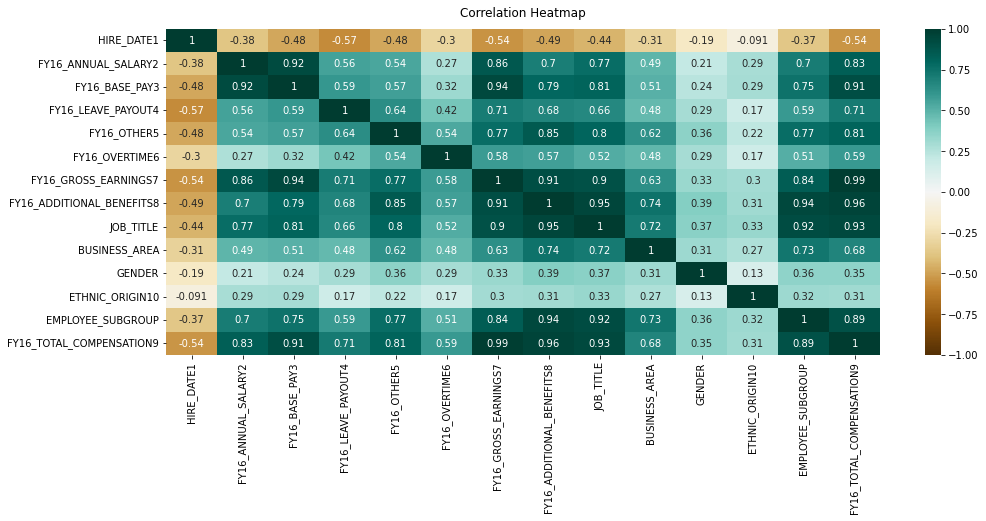

In [10]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

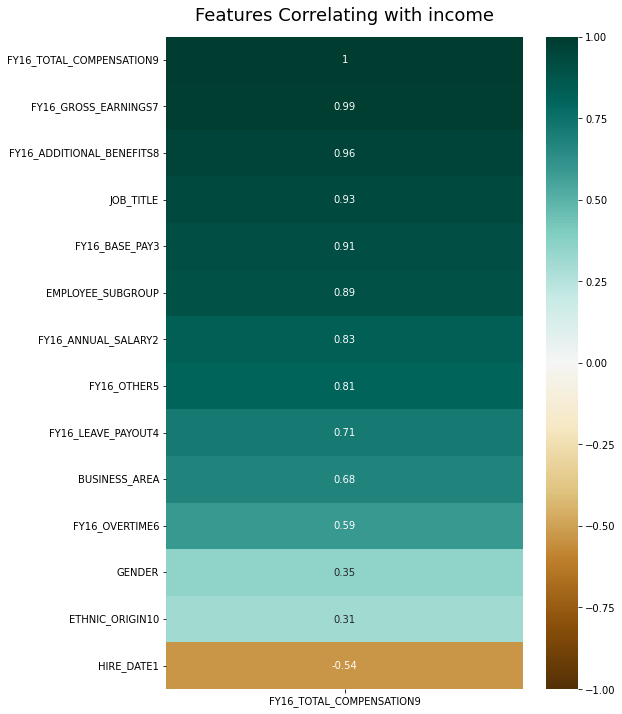

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['FY16_TOTAL_COMPENSATION9']].sort_values(by='FY16_TOTAL_COMPENSATION9', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with income', fontdict={'fontsize':18}, pad=16);